In [1]:
import io
import cv2
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [2]:
def zip2ram(filename):
    """ Carga un archivo zip en memoria. Retorna un diccionario[str,bytes] """
    result = {}
    with ZipFile(filename, mode="r") as archive:
        for info in archive.infolist():
            key = info.filename
            value = archive.read(key)
            result[key] = value
    return result

dataset = zip2ram('dataset.zip')

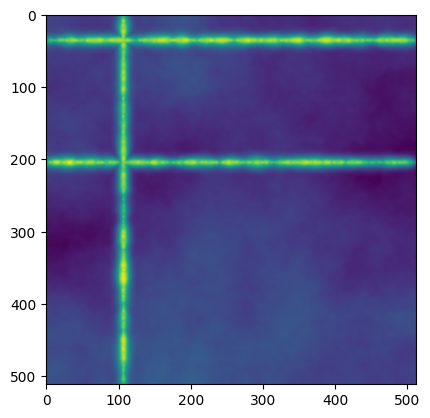

In [ ]:
size_dataset = len(dataset.keys()) // 4  # 1 input + 3 outputs

for idx in range(size_dataset):
    key_input = f'img_{idx}.npz'
    key_outputs = [f'img_backgound_{idx}.png', f'img_pretil_binary_{idx}.png', f'img_pretil_{idx}.png']

    byte_input = dataset.get(key_input, None)
    load_bytes = io.BytesIO(byte_input)
    input = np.load(load_bytes, allow_pickle=True)['arr_0']

    outputs = []
    for key_output in key_outputs:
        byte_output = dataset.get(key_output, None)
        if byte_output is not None:
            output = np.asarray(bytearray(byte_output), dtype="uint8")
            output = cv2.imdecode(output, 0)
            outputs.append(output)
        else:
            outputs.append(None)

    output1, output2, output3 = outputs

plt.imshow(input)

In [4]:
#TO DO
def get_image_batch(dataset, batch_size):
    size_dataset = len(dataset.keys()) // 4  # 1 input + 3 outputs
    batch = []

    for idx in range(min(batch_size, size_dataset)):
        key_input = f'img_{idx}.npz'
        key_outputs = [f'img_backgound_{idx}.png', f'img_pretil_binary_{idx}.png', f'img_pretil_{idx}.png']

        byte_input = dataset.get(key_input)
        load_bytes = io.BytesIO(byte_input)
        input_image = np.load(load_bytes, allow_pickle=True)['arr_0']

        outputs = []
        for key_output in key_outputs:
            byte_output = dataset.get(key_output)
            if byte_output:
                output = cv2.imdecode(np.frombuffer(byte_output, dtype="uint8"), cv2.IMREAD_GRAYSCALE)
                outputs.append(output)

        batch.append((input_image, *outputs))

    return batch